In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation,Flatten

import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation,Flatten

# Load Data

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

df=pd.read_csv('=DMON-wholedata_Xy.csv', low_memory=False)
print(df.shape)
print(df.columns.values)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(100)

(53410, 16)
['Unnamed: 0' 'TimePeriod' 'Act1' 'Act2' 'Act3' 'Act4' 'Act5' 'Act6'
 'Act7' 'Act8' 'Act9' 'Act10' 'Act11' 'Act12' 'id1' 'final_result']


,TimePeriod,Act1,Act2,Act3,Act4,Act5,Act6,Act7,Act8,Act9,Act10,Act11,Act12,id1,final_result
0,T0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
1,T1,20.0,0.0,5.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
2,T2,36.0,0.0,0.0,12.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
3,T3,19.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
4,T4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
5,T5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
6,T6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
7,T7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
8,T8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]
9,T9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.0],[0.0]


In [3]:
import re

df['TimePeriod'] = df['TimePeriod'].apply(lambda x: int(x.replace('T', '')))
df['id1'] = df['id1'].apply(lambda x: int(re.sub('\[(\d*)(\.0)\]', '\\1', x)))
df['final_result'] = df['final_result'].apply(lambda x: int(re.sub('\[(\d)(\.0)\]', '\\1', x)))
df.sort_values(by=['id1', 'TimePeriod'], inplace=True)

In [4]:
print(df['id1'].nunique())
print(df.groupby(['id1'])['id1'].count().unique())

5341
[10]


In [5]:
#print(df[['TimePeriod', 'final_result']].isna().sum())
#print(df.groupby('TimePeriod', as_index=False)['id1'].count())
#print(df['final_result'].value_counts())

In [6]:
df.head(100)


,TimePeriod,Act1,Act2,Act3,Act4,Act5,Act6,Act7,Act8,Act9,Act10,Act11,Act12,id1,final_result
0,0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,20.0,0.0,5.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2,36.0,0.0,0.0,12.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,3,19.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [7]:
# Generate input arrays
X_full1 = df.drop(['id1', 'final_result'], axis=1).values
#y_full1 = df['final_result'].values
#groupid = df['id1'].values
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_full1 = min_max_scaler.fit_transform(X_full1)
X_full1

array([[0.        , 0.00422982, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.0070497 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22222222, 0.01268946, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.77777778, 0.        , 0.00616016, ..., 0.        , 0.        ,
        0.        ],
       [0.88888889, 0.01903419, 0.06297057, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.00105746, 0.00273785, ..., 0.        , 0.        ,
        0.        ]])

## Reshape Data for `Keras`

In [8]:
X_full2 = np.array(X_full1.tolist())
print(X_full2.shape)
print(X_full2)
X_full3 = X_full2.reshape(5341, 10, 13)
print(X_full3.shape)
print(X_full3)

(53410, 13)
[[0.         0.00422982 0.         ... 0.         0.         0.        ]
 [0.11111111 0.0070497  0.         ... 0.         0.         0.        ]
 [0.22222222 0.01268946 0.         ... 0.         0.         0.        ]
 ...
 [0.77777778 0.         0.00616016 ... 0.         0.         0.        ]
 [0.88888889 0.01903419 0.06297057 ... 0.         0.         0.        ]
 [1.         0.00105746 0.00273785 ... 0.         0.         0.        ]]
(5341, 10, 13)
[[[0.00000000e+00 4.22982023e-03 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.11111111e-01 7.04970039e-03 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [2.22222222e-01 1.26894607e-02 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [7.77777778e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [8.88888889e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 

In [9]:
print(X_full3.shape)
#print(y_full3.shape)

(5341, 10, 13)


### 截止到目前，我把用于LSTM的input data准备好了，接下来要去实现以block为单位的cross-validation（见word需求文档），offerbang老师说用GroupKFold-Shuffle可以实现。但是特别需求是我的LSTM的input data需要是二维的（见word需求文档），因此以下代码需要老师帮助，一直到最后能够成功建模即可（不用管模型调参）

In [10]:
from sklearn.model_selection import GroupKFold

In [11]:
y = df.groupby('id1')['final_result'].unique()
y = [x[0] for x in y]
y = np.array(y)
groupid = df['id1'].unique()
groupid = np.array(groupid)

In [12]:
from sklearn.model_selection import StratifiedGroupKFold
X = X_full3
y = y
groups = groupid

cv = StratifiedGroupKFold(n_splits=10)
for train_index, test_index in cv.split(X, y, groups):
    print("TRAIN:", groups[train_index])
    print("      ", y[train_index])
    print(" TEST:", groups[test_index])
    print("      ", y[test_index])

TRAIN: [   1    2    3 ... 5337 5338 5339]
       [1 0 1 ... 1 1 0]
 TEST: [   0   12   20   30   43   50   62   72   80   90  100  111  122  131
  140  150  162  173  180  190  201  215  223  230  240  252  260  270
  280  291  301  314  320  331  341  351  360  370  384  391  400  410
  421  430  440  452  460  470  481  490  502  511  520  533  542  552
  561  570  582  592  605  611  623  630  641  651  661  670  681  691
  701  710  720  730  740  753  760  771  781  790  800  811  821  831
  840  850  860  870  881  890  900  910  921  931  941  951  960  972
  983  992 1000 1012 1020 1031 1041 1050 1061 1070 1081 1091 1103 1114
 1120 1132 1141 1152 1160 1170 1180 1192 1200 1210 1220 1230 1240 1253
 1262 1271 1280 1290 1303 1310 1320 1331 1340 1350 1360 1370 1380 1390
 1401 1411 1421 1430 1441 1451 1460 1471 1481 1490 1500 1511 1524 1531
 1540 1550 1562 1573 1580 1592 1600 1613 1620 1630 1640 1650 1660 1671
 1683 1691 1702 1711 1722 1730 1740 1750 1763 1773 1781 1791 1800 1811
 1

X = X_full3
y = y
groups = groupid
group_kfold = GroupKFold(n_splits=10)
group_kfold.get_n_splits(X, y, groups)
print(group_kfold)

for train_idxs, test_idxs in cv.split(X, y, groups):
    print("TRAIN:\n", train_index, "\nTEST:\n", test_index)    
    X_train, X_test = X[train_index], X[test_index]    
    y_train, y_test = y[train_index], y[test_index]    
    print(X_train, X_test, y_train, y_test)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print('Percentage of 1\'s in train: {}; Percentage of 1\'s in test: {}'.format(
        np.mean(y), np.mean(y[X_test, :])))

**Note: I just run two iterations for this 10-fold group shuffled cross validation. Please complete this process by yourself.**

In [13]:
cvscores_accuracy = []
cvscores_fscore = []
cvscores_auc = []

for train_index, test_index in cv.split(X, y, groups):
    cvscores_fscore_temp = 0
    print("\nRunning a new one...")

    X_train, X_test = X[train_index], X[test_index]    
    y_train, y_test = y[train_index], y[test_index]   
    
    print('\n # of train:{}; # of test:{}; total #:{}'.format(len(X_train), len(X_test), len(X_train)+len(X_test)))
    
    lr=0.0001
    epochs = 700
    model = Sequential()
    model.add(LSTM(32, dropout=0.2, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
    model.add(LSTM(16, dropout=0.2, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                  metrics=['accuracy','Recall','Precision', 'AUC'])
    print(model.summary())
    history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=0)
    scores = model.evaluate(X_test, y_test)
    cvscores_fscore_temp = (2*scores[2]*scores[3])/(scores[2]+scores[3])
    print("\nresult:")
    print(scores[1])
    print(cvscores_fscore_temp)
    print(scores[4])

    cvscores_accuracy.append(scores[1] * 100)
    cvscores_fscore.append(cvscores_fscore_temp * 100)
    cvscores_auc.append(scores[4] * 100)

print("\nfinal result:")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy), np.std(cvscores_accuracy)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_fscore), np.std(cvscores_fscore)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_auc), np.std(cvscores_auc)))


Running a new one...

 # of train:4806; # of test:535; total #:5341
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 32)            5888      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 9,041
Trainable params: 9,041
Non-trainable params: 0
_________________________________________________________________
None
17/17 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.9047 - recall: 0.9601 - precision: 0.9093 - auc: 0.9301

result:
0.9046729207038879
0.934023269693004
0.9300900101661682

Running a new one...

 # of train:4807; 

17/17 [==============================] - 0s 11ms/step - loss: 0.3178 - accuracy: 0.8708 - recall: 0.9680 - precision: 0.8643 - auc: 0.9028

result:
0.8707864880561829
0.9132075410332278
0.9028176069259644

Running a new one...

 # of train:4807; # of test:534; total #:5341
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 10, 32)            5888      
                                                                 
 lstm_17 (LSTM)              (None, 16)                3136      
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,041
Trainable params: 9,041
Non-trainable params: 0
_________________________________________________________________
None
17/17 [==============================

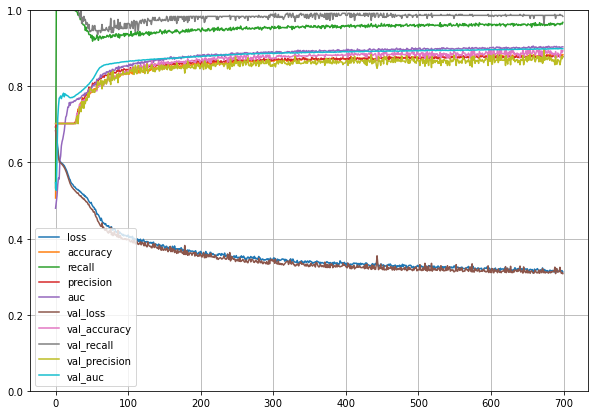

In [14]:
import matplotlib.pyplot as plt

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()